# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping...Error:{e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cidreira
Processing Record 2 of Set 1 | nova sintra
Processing Record 3 of Set 1 | udachny
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | codrington
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | badger
Processing Record 9 of Set 1 | gadzhiyevo
Processing Record 10 of Set 1 | freetown
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | quelimane
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | kargil
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | swan hill
Processing Record 19 of Set 1 | santo tome
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | tomatlan
Processing Record

Processing Record 39 of Set 4 | nagqu
Processing Record 40 of Set 4 | los frentones
Processing Record 41 of Set 4 | cruzeiro do sul
Processing Record 42 of Set 4 | san patricio
Processing Record 43 of Set 4 | santa cruz
Processing Record 44 of Set 4 | xinyuan
Processing Record 45 of Set 4 | chernyshevskiy
Processing Record 46 of Set 4 | vila franca do campo
Processing Record 47 of Set 4 | robel
Processing Record 48 of Set 4 | mandalgovi
Processing Record 49 of Set 4 | riolandia
Processing Record 0 of Set 5 | dondo
Processing Record 1 of Set 5 | el hadjar
Processing Record 2 of Set 5 | georgetown
Processing Record 3 of Set 5 | puerto el triunfo
Processing Record 4 of Set 5 | freeport
Processing Record 5 of Set 5 | jamestown
Processing Record 6 of Set 5 | maintirano
Processing Record 7 of Set 5 | invercargill
Processing Record 8 of Set 5 | kosciuszko national park
City not found. Skipping...Error:'coord'
Processing Record 9 of Set 5 | la passe
Processing Record 10 of Set 5 | nar'yan-mar


Processing Record 21 of Set 8 | krasnapollye
Processing Record 22 of Set 8 | aracataca
Processing Record 23 of Set 8 | biltine
Processing Record 24 of Set 8 | kayangel
Processing Record 25 of Set 8 | santa vitoria do palmar
Processing Record 26 of Set 8 | tugulym
Processing Record 27 of Set 8 | pathein
Processing Record 28 of Set 8 | port lincoln
Processing Record 29 of Set 8 | grand gaube
Processing Record 30 of Set 8 | happy valley-goose bay
Processing Record 31 of Set 8 | fada
Processing Record 32 of Set 8 | byakabanda
Processing Record 33 of Set 8 | trincomalee
Processing Record 34 of Set 8 | ambodifotatra
Processing Record 35 of Set 8 | chaparral
Processing Record 36 of Set 8 | hilo
Processing Record 37 of Set 8 | bubaque
Processing Record 38 of Set 8 | marshall
Processing Record 39 of Set 8 | sao gabriel da cachoeira
Processing Record 40 of Set 8 | gargalianoi
Processing Record 41 of Set 8 | okha
Processing Record 42 of Set 8 | eirunepe
Processing Record 43 of Set 8 | magdagachi


Processing Record 1 of Set 12 | nemuro
Processing Record 2 of Set 12 | danli
Processing Record 3 of Set 12 | balurghat
Processing Record 4 of Set 12 | fomboni
Processing Record 5 of Set 12 | klaksvik
Processing Record 6 of Set 12 | rumphi
Processing Record 7 of Set 12 | caucete
Processing Record 8 of Set 12 | meadow lake
Processing Record 9 of Set 12 | mahina
Processing Record 10 of Set 12 | harstad
Processing Record 11 of Set 12 | quepos
Processing Record 12 of Set 12 | tobelo
Processing Record 13 of Set 12 | zhangye
Processing Record 14 of Set 12 | horn
Processing Record 15 of Set 12 | kalmunai
Processing Record 16 of Set 12 | ocampo
Processing Record 17 of Set 12 | arauco
Processing Record 18 of Set 12 | sretensk
Processing Record 19 of Set 12 | plesetsk
Processing Record 20 of Set 12 | akom ii
Processing Record 21 of Set 12 | lensk
Processing Record 22 of Set 12 | caudete
Processing Record 23 of Set 12 | ballina
Processing Record 24 of Set 12 | bratsk
Processing Record 25 of Set 12

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cidreira,-30.1811,-50.2056,25.60,84,100,4.02,BR,1701967310
1,nova sintra,14.8667,-24.7167,21.17,76,100,6.73,CV,1701967310
2,udachny,66.4167,112.4000,-25.31,75,99,1.26,RU,1701967310
3,wailua homesteads,22.0669,-159.3780,20.44,83,20,3.09,US,1701967310
4,adamstown,-25.0660,-130.1015,22.56,78,40,4.88,PN,1701967310


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cidreira,-30.1811,-50.2056,25.60,84,100,4.02,BR,1701967310
1,nova sintra,14.8667,-24.7167,21.17,76,100,6.73,CV,1701967310
2,udachny,66.4167,112.4000,-25.31,75,99,1.26,RU,1701967310
3,wailua homesteads,22.0669,-159.3780,20.44,83,20,3.09,US,1701967310
4,adamstown,-25.0660,-130.1015,22.56,78,40,4.88,PN,1701967310


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

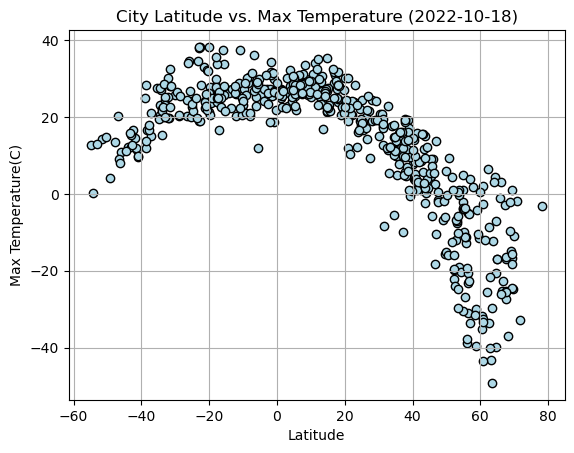

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="lightblue",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

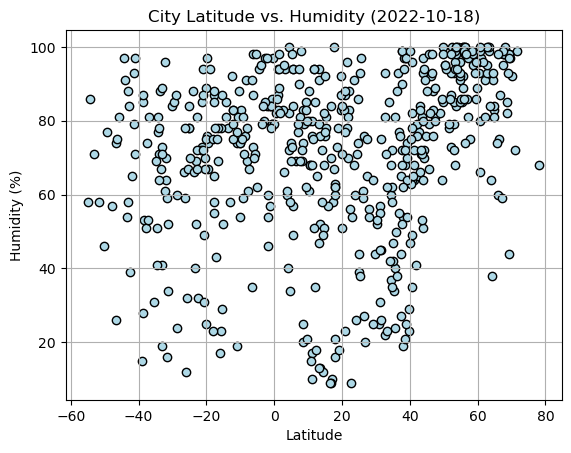

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="lightblue",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

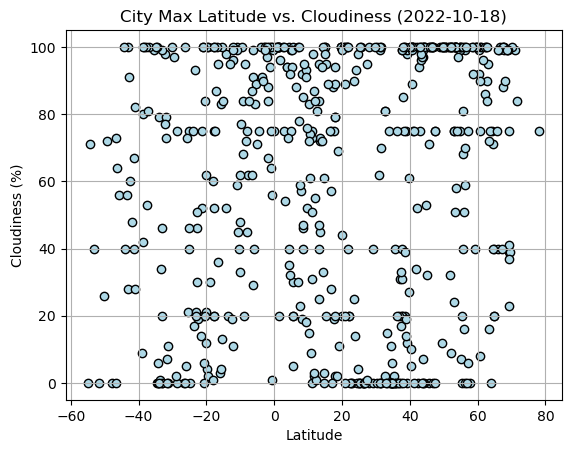

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="lightblue",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

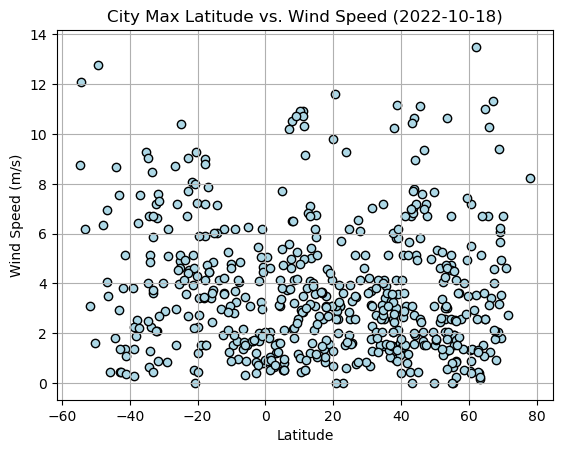

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="lightblue",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_data, y_data, x_label, y_label, title):

    # Calculate linear regression line
    slope, intercept = np.polyfit(x_data, y_data, 1)
    regression_line = slope * np.array(x_data) + intercept

    # Create scatter plot
    plt.scatter(x_data, y_data, marker="o", facecolors="blue", edgecolors="black", label="Data")

    # Plot the linear regression line
    plt.plot(x_data, regression_line, color="red", label="Linear Regression")

    # Set plot labels and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nova sintra,14.8667,-24.7167,21.17,76,100,6.73,CV,1701967310
2,udachny,66.4167,112.4000,-25.31,75,99,1.26,RU,1701967310
3,wailua homesteads,22.0669,-159.3780,20.44,83,20,3.09,US,1701967310
7,badger,64.8000,-147.5333,-17.05,83,20,2.57,US,1701967310
8,gadzhiyevo,69.2551,33.3362,-16.65,98,39,6.05,RU,1701967311


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cidreira,-30.1811,-50.2056,25.60,84,100,4.02,BR,1701967310
4,adamstown,-25.0660,-130.1015,22.56,78,40,4.88,PN,1701967310
5,codrington,-38.2667,141.9667,16.65,53,100,1.89,AU,1701967310
6,waitangi,-43.9535,-176.5597,12.12,91,40,8.67,NZ,1701967310
10,ancud,-41.8697,-73.8203,14.51,65,48,3.83,CL,1701967311


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7586236910420555


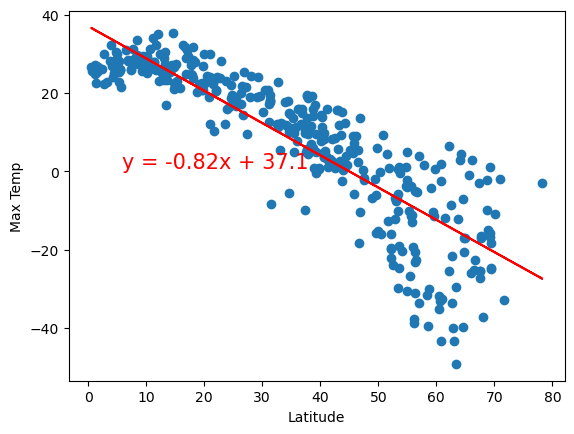

In [40]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

[m, b, rvalue, pvalue, stderrr] = linregress(x_values, y_values)
regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.plot(x_values, regress_values, "r-")
plt.scatter(x_values, y_values)
plt.annotate(line_eq,(5.8,0.8), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.3461684253028997


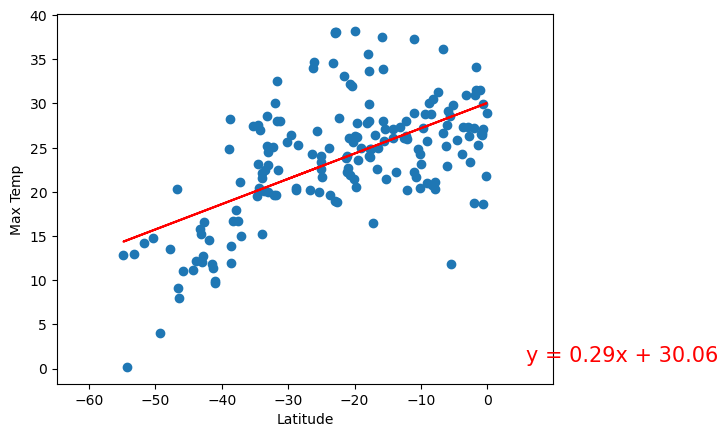

In [63]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

[m, b, rvalue, pvalue, stderrr] = linregress(x_values, y_values)
regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.plot(x_values, regress_values, "r-")
plt.scatter(x_values, y_values)
plt.annotate(line_eq,(5.8,0.8), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

min_limit = min(x_values) - 10  
max_limit = max(x_values) + 10
plt.xlim(min_limit, max_limit)

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
1. In the Northern Hemipshere there is a negative correlation between Latitude and Max Temp. As Latitude increases, the Max Temp decreases. This is because areas at higher latitutes receive less direct sunlight and, on average, experience cooler temperatues.
2. In the Southern Hemisphere there is a positive correlation between Latitude and Max Temp. As Latitude decreases, the Max Temp increases. This is because areas closer to the equator receive more direct sunlight and, on average, experience warmer temperatures. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12022192865566995


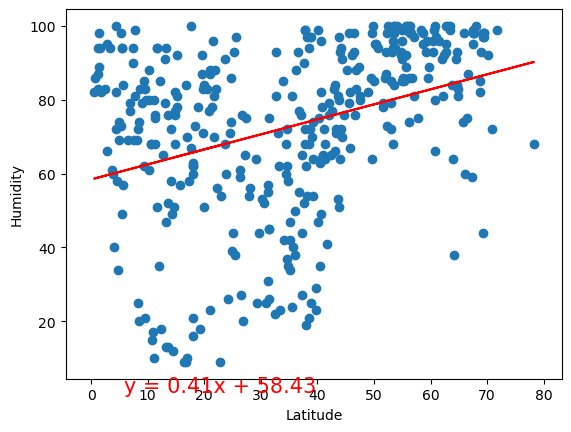

In [78]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

[m, b, rvalue, pvalue, stderrr] = linregress(x_values, y_values)
regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(min(x_values) + 5, min(y_values) + 5),(5.8,0.8), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

min_limit = min(x_values) - 5 
max_limit = max(x_values) + 5
plt.xlim(min_limit, max_limit)

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.03944565239508983


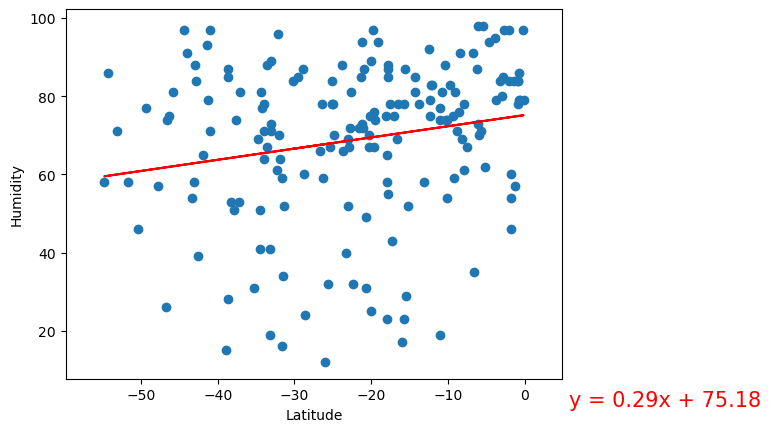

In [88]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

[m, b, rvalue, pvalue, stderrr] = linregress(x_values, y_values)
regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.plot(x_values, regress_values, "r-", label=line_eq)
plt.scatter(x_values, y_values)
plt.annotate(line_eq,(min(x_values) + 5, min(y_values) + 5),(5.8,0.8), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

min_limit = min(x_values) - 5
max_limit = max(x_values) + 5
plt.xlim(min_limit, max_limit)

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
1. In the Northern Hemisphere there is a positive correlation between Latitude and Humidity. As Latitude increases, the Humidity also increases. This is because, in many cases, higher latitudes may experience cooler temperatures and have a greater potential for moisture in the air.
2. In the Southern Hemisphere there is a positive correlation between Latitude and Humidity. As Latitude decreases, the Humidity increases. This is because areas closer to the equator often experience warmer temperatures, and warm air can hold more moisture.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.013531118126368051


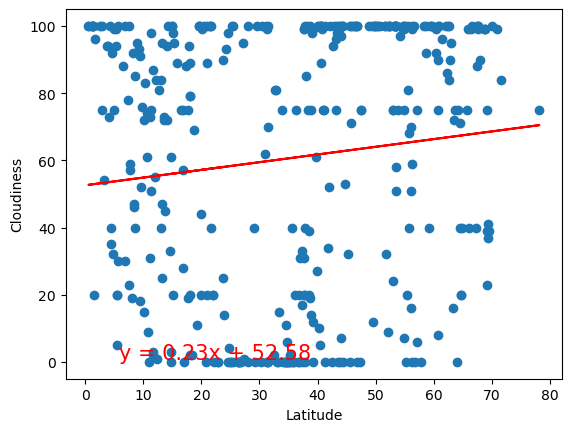

In [90]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

[m, b, rvalue, pvalue, stderrr] = linregress(x_values, y_values)
regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.plot(x_values, regress_values, "r-")
plt.scatter(x_values, y_values)
plt.annotate(line_eq,(5.8,0.8), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.0792729409201052


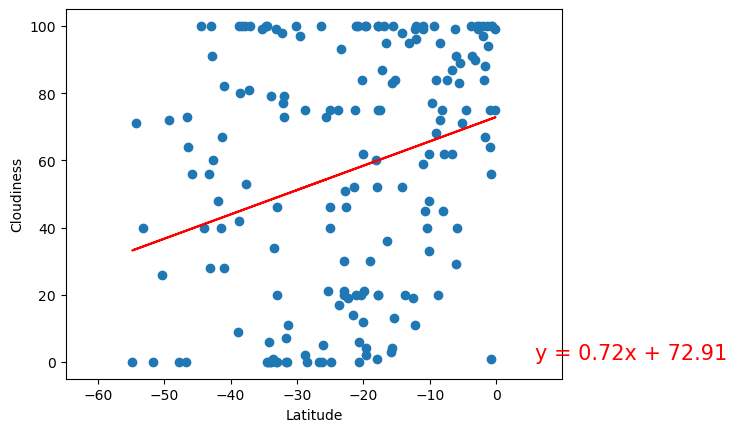

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

[m, b, rvalue, pvalue, stderrr] = linregress(x_values, y_values)
regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.plot(x_values, regress_values, "r-")
plt.scatter(x_values, y_values)
plt.annotate(line_eq,(5.8,0.8), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

min_limit = min(x_values) - 10  
max_limit = max(x_values) + 10
plt.xlim(min_limit, max_limit)

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
1. In the Northern Hemisphere there is a slight positive correlation between Latitude and Cloudiness. As Latitude increases, the Cloudiness also increases. This is because, higher latitudes generally experience larger temperature graients, which can lead to more dynamic weather patterns and increased cloud formation.
2. In the Southern Hemisphere there is a positive correlation between Latitude and Cloudiness. As Latitude decreases, the Cloudiness increases. This is because regions near the equator often include tropical rainforests, where high humidity and abundant moisture contribute to cloud formation.

### Wind Speed vs. Latitude Linear Regression Plot

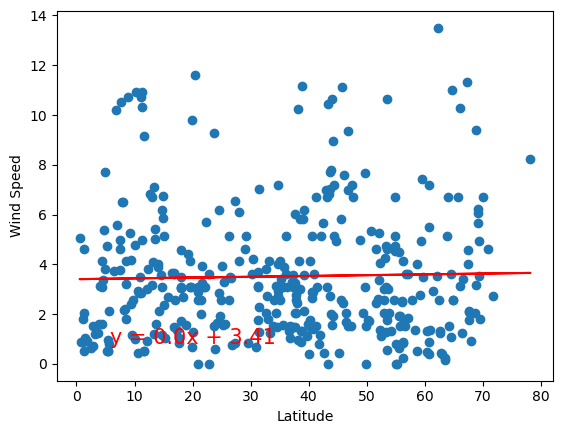

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

[m, b, rvalue, pvalue, stderrr] = linregress(x_values, y_values)
regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.plot(x_values, regress_values, "r-")
plt.scatter(x_values, y_values)
plt.annotate(line_eq,(5.8,0.8), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: 0.05498554266053084


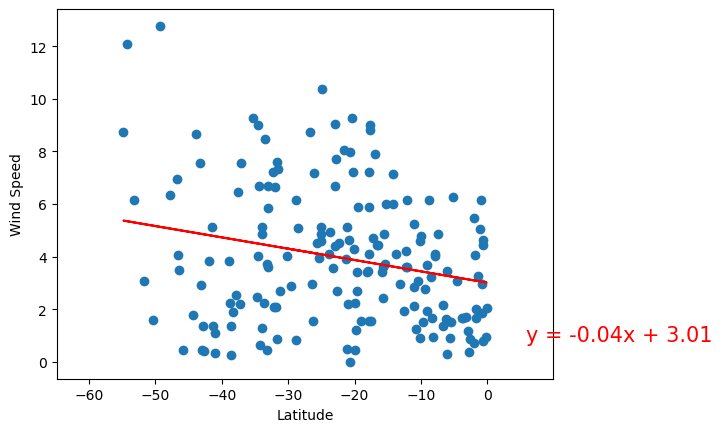

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

[m, b, rvalue, pvalue, stderrr] = linregress(x_values, y_values)
regress_values = x_values * m + b
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.plot(x_values, regress_values, "r-")
plt.scatter(x_values, y_values)
plt.annotate(line_eq,(5.8,0.8), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

min_limit = min(x_values) - 10  
max_limit = max(x_values) + 10
plt.xlim(min_limit, max_limit)

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
1. In the Northern Hemisphere there is a no discernible correlation between Latitude and Wind Speed. As Latitude increases, the wind speed is unimpacted. This is due to a number of factors including: local weather/pressure systems, topography influences on wind speeds, seasonal changes, and the Coriolis effect (earth's rotation setting winds from east-west movement).
2. In the Southern Hemisphere sample there is a negative correlation between Latitude and Wind Speed. As Latitude decreases, the Wind Speed decreases. This is because cities in the sample with lower latitudes experienced higher wind speeds.